In [4]:
print("hello")

hello


## Dataset based on UWB for Clinical Establishments

### Introduction
This dataset, donated on 11/21/2022, presents a unique collection of data obtained from an intelligent surveillance system implemented in clinical establishments. The system leverages Ultra Wide Band (UWB) technology to track and monitor patient movements within hospitals. With the aim of enhancing patient management and optimizing healthcare delivery, this dataset provides valuable insights into the chronophagous behavior of patients as they move in and out of hospital premises.

#### Purpose
The primary purpose of this dataset is to support research and development in the field of smart healthcare systems. By utilizing UWB technology, the dataset offers opportunities for exploring innovative approaches to patient tracking, monitoring, and management within clinical environments.

#### Funding
The creation of this dataset was made possible through funding provided by the Department of Science and Technology-Natural Resource Database Management System (DST-NRDMS) [Grant No: NRDMS/UG/NetworkProject/e-13/2019 (C) P-4]. This support underscores the importance of advancing technology-driven solutions for healthcare management.

### Dataset Overview
- **Instances**: 608
- **Features**: 8
- **Feature Types**: Integer and Categorical
- **Missing Values**: None
- **License**: Creative Commons Attribution 4.0 International (CC BY 4.0)

### Objective
The objective of utilizing this dataset is to explore patterns in patient movement, analyze factors influencing patient flow within clinical establishments, and develop predictive models for optimizing healthcare resource allocation and patient care pathways.

Let's begin by loading the dataset and exploring its contents.

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing necessary libraries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [7]:
df = pd.read_csv('blink.csv')

In [8]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA
0,1,ANCH0001,TAG00001,0,0,1,7.280000e+11,7.284800e+11
1,2,ANCH0004,TAG00001,0,0,1,7.280000e+11,7.284800e+11
2,3,ANCH0002,TAG00001,0,0,1,7.280000e+11,7.284800e+11
3,4,ANCH0003,TAG00001,0,0,1,7.280000e+11,7.284800e+11
4,5,ANCH0001,TAG00001,1,0,1,7.590000e+11,7.590540e+11


In [9]:
df.columns

Index(['id', 'anchorID', 'tagID', 'sequenceID', 'pan', 'processed_flag',
       'timestampToA', 'Timestamp ToA'],
      dtype='object')

**Dataset Features**
1. id: This is likely a unique identifier for each data record in the dataset.

2. anchorID: This identifies the specific UWB anchor that received the signal from the tag.

3. tagID: This identifies the specific UWB tag that transmitted the signal.

4. sequenceID: This might indicate the sequence number within a series of transmissions from the same tag.

5. pan: This could refer to the Personal Area Network (PAN) identifier associated with the UWB communication.

6. processed_flag: This flag likely indicates whether the data has been processed or filtered in some way.

7. timestampToA: This is the timestamp of the Time of Arrival (ToA) measurement, indicating when the signal arrived at the anchor.

8. Timestamp ToA: This appears to be a duplicate column with the same information as timestampToA. It's possible it's a typo or redundant data.

#### DataFrame Information
The `.info()` function provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              608 non-null    int64  
 1   anchorID        608 non-null    object 
 2   tagID           608 non-null    object 
 3   sequenceID      608 non-null    int64  
 4   pan             608 non-null    int64  
 5   processed_flag  608 non-null    int64  
 6   timestampToA    608 non-null    float64
 7   Timestamp ToA   608 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 38.1+ KB


``Insights``💡
- The DataFrame consists of 608 entries and 8 columns.
- The data types include integers, floats, and objects.
- All columns have non-null values, indicating no missing data.
- The 'anchorID' and 'tagID' columns are categorical, while the rest are numerical.
- The 'timestampToA' and 'Timestamp ToA' columns appear to contain similar data and may require further actions for redundancy.

**Primary Objective:**

The primary objective of the Ultra Wide Band (UWB) system is to determine the precise location of a signal transmitter, "TAB00001", within the monitored area using triangulation techniques. By leveraging the signals received by multiple anchors, namely "ANCH0001", "ANCH0002", and "ANCH0003", the system aims to calculate the position coordinates of the transmitter.

**Triangulation Technique:**

1. **Signal Transmission:** The transmitter, "TAB00001", emits signals that are received by multiple anchors placed in known locations within the area.

2. **Time of Arrival (ToA) Measurement:** Each anchor measures the time it takes for the signal emitted by the transmitter to arrive. This time difference, along with the known speed of signal propagation (usually the speed of light), helps in calculating the distances between the transmitter and each anchor.

3. **Distance Calculation:** Using the ToA measurements and the speed of signal propagation, the distances between the transmitter and each anchor can be calculated using the formula:
      - Distance = speed of light * time diffrence

4. **Triangulation:** With the distances from the transmitter to each anchor known, triangulation techniques are employed to determine the transmitter's position. Three anchors are sufficient for triangulation, as they provide three distance measurements.

   - One common method is the **Trilateration** technique, where circles (or spheres in 3D) are drawn around each anchor with a radius equal to the calculated distance. The intersection points of these circles (or spheres) represent the possible locations of the transmitter. 

      - Euclidean distance : $\sqrt{(x'-x)^2 + (y'-y)^2}$

   - Another method is the **Multilateration** technique, which uses hyperbolic curves instead of circles. The transmitter's position is determined by finding the intersection points of these hyperbolic curves.

Equate Distance and Euclidean distance, find the coordinate.

**Filtering Process:**

The filtering process involves selecting data related to only the required anchors for triangulation, namely "ANCH0001", "ANCH0002", and "ANCH0003", while excluding "ANCH0004". This ensures that only the relevant data points are used in the triangulation calculation, improving accuracy and efficiency in position estimation.


In [11]:
filtered_df = df[(df['anchorID'] != 'ANCH0001') & (df['anchorID'] != 'ANCH0002') & (df['anchorID'] != 'ANCH0003')]

df = df.drop(filtered_df.index)

This code segment filters the dataset to retain only rows where at least three anchors received signals from the transmitter "TAB00001". This ensures sufficient data for accurate triangulation, enhancing position estimation.

In [12]:
seq = df['sequenceID'].unique()

for id in seq:
    Len = len(df[df['sequenceID'] == id])
    if Len < 3:
        df.drop(df[df['sequenceID'] == id].index, inplace=True)

**Triangulation Method:**

The provided code segment implements a triangulation method to estimate the position of a transmitter using distance measurements from three anchors ("ANCH0001", "ANCH0002", and "ANCH0003"). 

1. **Distance Calculation:** The distances between the transmitter and each anchor are calculated using time-of-flight measurements and the speed of light.

2. **Equation Setup:** For each pair of anchors, a system of equations representing the intersection of circles (or spheres) centered at each anchor and with radii equal to the measured distances is set up.

3. **Numerical Solution:** The equations are solved numerically using the `fsolve` function from `scipy.optimize` to find the intersection points, which represent potential positions of the transmitter.

4. **Selection of Valid Coordinates:** The coordinates of the potential positions are evaluated, and the valid coordinate that lies in the positive quadrant (where both x and y coordinates are positive) is selected.

By repeating this process for each sequence of distance measurements, the code estimates the transmitter's position through triangulation.

In [13]:
seqId = df['sequenceID'].unique()

In [14]:
import numpy as np
from scipy.optimize import fsolve

coordinates = []

# Define the equations for pair 1
def equations_pair1(vars):
    x, y = vars
    eq1 = (x - 0)**2 + (y - 0)**2 - d1**2
    eq2 = (x - 0)**2 + (y - 5)**2 - d2**2
    return [eq1, eq2]

# Define the equations for pair 2
def equations_pair2(vars):
    x, y = vars
    eq1 = (x - 0)**2 + (y - 5)**2 - d2**2
    eq2 = (x - 5)**2 + (y - 5)**2 - d3**2
    return [eq1, eq2]

# Define the equations for pair 3
def equations_pair3(vars):
    x, y = vars
    eq1 = (x - 0)**2 + (y - 0)**2 - d1**2
    eq2 = (x - 5)**2 + (y - 5)**2 - d3**2
    return [eq1, eq2]

for Sid in seqId:
    temp = df[df['sequenceID'] == Sid]
    t1 = temp[temp['anchorID'] == 'ANCH0001'].values[0][7]
    t2 = temp[temp['anchorID'] == 'ANCH0002'].values[0][7]
    t3 = temp[temp['anchorID'] == 'ANCH0003'].values[0][7]  

    # Distance measurements
    d1 = (t1/10000) * .299792458 
    d2 = (t2/10000) * .299792458 
    d3 = (t3/10000) * .299792458 

    # Solve pair 1 equations
    solution_pair1 = fsolve(equations_pair1, [5, 5])  # Initial guess for x and y
    
    # Solve pair 2 equations
    solution_pair2 = fsolve(equations_pair2, [5, 5])  

    # Solve pair 3 equations
    solution_pair3 = fsolve(equations_pair3, [5, 5]) 

    t_coordinates = [solution_pair1, solution_pair2, solution_pair3]
    
    # Select the appropriate coordinate
    for coord in t_coordinates:
        if coord[0] >= 0 and coord[1] >= 0: 
            coordinates.append([round(coord[0], 3)/1000000, round(coord[1], 3)/1000000, 0])

**Synthetic Data Interpolation:**

Generating synthetic data points to simulate another area in the hospital, specifically the patient ward. 

1. **Random Coordinate Generation:** Within a loop iterating 342 times, random x and y coordinates are generated using the `random.randint` function. The range for x coordinates is set between 5 and 8, while for y coordinates, it is set between 3 and 8.

2. **Data Format:** Each generated coordinate is appended to the `coordinates` list in the format [x, y, 1], where the third element represents the patient ward area.

This process interpolates synthetic data to mimic the distribution of coordinates in the patient ward area, aiding in the analysis and testing of algorithms or systems designed for that specific hospital section.

In [15]:
import random

for _ in range(342):
    x = random.randint(5, 8)
    y = random.randint(3, 8)
    coordinates.append([x, y, 1])

**CSV Export:**

The calculated coordinates and synthetic data are converted to a CSV format for easy storage and sharing.

1. **DataFrame Creation:** The `coordinates` list containing the calculated coordinates and synthetic data is converted to a DataFrame using Pandas. The DataFrame columns are labeled as 'x', 'y', and 'Room' to represent the x-coordinate, y-coordinate, and the designation of the area (e.g., walking area, patient ward).

This process facilitates further analysis and visualization of the data using various tools and platforms.


In [16]:
data = pd.DataFrame(data = coordinates, columns= ['x', 'y', 'Room'])

data.to_csv('coordinates.csv', index= False)   # The `index=False` parameter ensures that the DataFrame index is not included in the CSV file.

Reading coordinates.csv file

In [17]:
cdf = pd.read_csv("coordinates.csv")

In [18]:
cdf.shape

(684, 3)

In [19]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       684 non-null    float64
 1   y       684 non-null    float64
 2   Room    684 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 16.2 KB


``Insights``💡

- **Data Structure:** The dataset comprises 684 entries and 3 columns.
- **Feature Description:**
  1. **x:** Represents the x-coordinate of the data points. It is stored as a floating-point number.
  2. **y:** Represents the y-coordinate of the data points. It is stored as a floating-point number.
  3. **Room:** Indicates the designation of the area corresponding to the coordinates, possibly representing different sections or rooms within the hospital. It is stored as an integer.

This dataset provides spatial information about various locations within the hospital, facilitating analysis and visualization of the distribution of coordinates across different areas.


**Visualization:**

A scatter plot is created using Seaborn (`sns.scatterplot`) to visualize the spatial distribution of coordinates in the dataset (`cdf`). The x-coordinate is represented on the x-axis, the y-coordinate on the y-axis, and the points are colored according to the designation of the area (`Room`). 

This visualization helps in understanding the distribution and clustering of coordinates across different ares.

<Axes: xlabel='x', ylabel='y'>

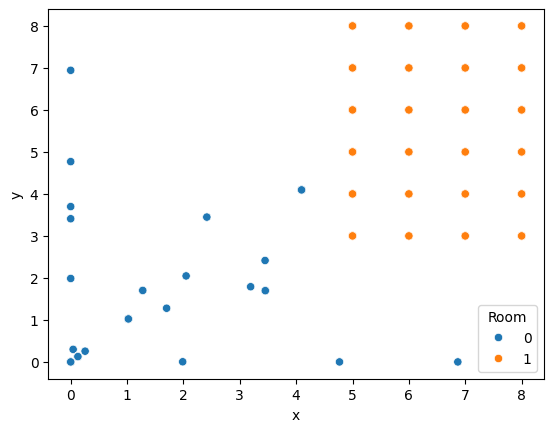

In [20]:
sns.scatterplot(x = 'x', y = 'y', data= cdf, hue= 'Room')

**Dataset Splitting:**

The dataset (`cdf`) is split into features (x) and target variable (y) to prepare for model building.

- **Features (x):** The features include the 'x' and 'y' coordinates extracted from the dataset.
- **Target Variable (y):** The target variable represents the designation of the area ('Room') corresponding to the coordinates.

This splitting allows for the separation of input features and output labels, enabling the construction and evaluation of predictive models.


In [21]:
x = cdf[['x', 'y']]
y = cdf['Room']

**Train-Test Split:**

The dataset is split into training and testing sets using the `train_test_split` function from `sklearn.model_selection`.

- **Training Features (xtrain) and Labels (ytrain):** These sets contain a subset of features (coordinates) and corresponding target labels (designation of areas) used for training the model.

- **Testing Features (xtest) and Labels (ytest):** These sets contain the remaining features and labels reserved for evaluating the trained model's performance.

This split ensures that the model is trained on one subset of the data and tested on another, enabling unbiased evaluation of its predictive capabilities.


In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.33)

**Feature Scaling:**

The `StandardScaler` from `sklearn.preprocessing` is used to scale the features to a standard normal distribution.

- **Scaling:** The `fit_transform` method is applied to the training features (`xtrain`) to compute the mean and standard deviation of each feature and then scale the features accordingly.

- **Transform:** The `transform` method is applied to the testing features (`xtest`) using the parameters learned from the training set. This ensures that both training and testing features are scaled consistently.

Feature scaling is important for many machine learning algorithms, particularly those sensitive to the scale of features, ensuring more stable and efficient model training.


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

**Model Training:**

Random Forest Classifier is trained using the scaled training features (`xtrain_sc`) and corresponding target labels (`ytrain`).

- **Model Initialization:** An instance of the Random Forest Classifier model is created.

- **Model Fitting:** The `fit` method is called to train the model on the training data, where the model learns the relationship between the features and the target labels.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [3, 4, 5],  
    'max_depth': [2, 4, 5 ],  
    'min_samples_split': [2, 3, 5]  
}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the data
grid_search.fit(xtrain, ytrain)  

# Retrieve the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)



clf = RandomForestClassifier(max_depth=2, n_estimators=5)

# Train the classifier
clf.fit(xtest_sc, ytest)

Best parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 3}
Best estimator: RandomForestClassifier(max_depth=2, n_estimators=3)


RandomForestClassifier(max_depth=2, n_estimators=5)

**Prediction:**

Using the trained Random Forest Classifier model, predictions are made on the scaled testing features (`xtest_sc`).

- **Prediction:** The `predict` method is applied to the scaled testing features to generate predictions for the target variable (`y_pred`).

These predictions represent the model's classification decisions for the testing data, allowing for evaluation of its performance.

In [46]:
y_pred = clf.predict(xtest_sc)

**Model Evaluation:**

The performance of the logistic regression model is evaluated using accuracy metrics.

- **Accuracy Calculation:** The `accuracy_score` function from `sklearn.metrics` is used to compute the accuracy of the model predictions compared to the actual target labels (`ytest`).

- **Training Accuracy:** The accuracy of the model on the training data is calculated using the `score` method applied to the scaled training features and corresponding target labels (`xtrain_sc`, `ytrain`).

- **Testing Accuracy:** Similarly, the accuracy of the model on the testing data is calculated using the `score` method applied to the scaled testing features and corresponding target labels (`xtest_sc`, `ytest`).

These accuracy scores provide insights into the overall performance of the Random Forest Classifier on both the training and testing datasets.

In [47]:
from sklearn.metrics import accuracy_score

print("Accuracy:%.2f"%accuracy_score(ytest,y_pred))
print("training Accuracy: ", clf.score(xtrain_sc,ytrain))
print("testing Accuracy: ", clf.score(xtest_sc,ytest))

Accuracy:1.00
training Accuracy:  0.9978165938864629
testing Accuracy:  1.0


#### Confusion Matrix:
|      | Predicted Negative | Predicted Positive |
|------|--------------------|--------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

print("Confusion matrix:\n\n",cm)

Confusion matrix:

 [[117   0]
 [  0 109]]


#### Components of the classification report:

1. **Precision**: Precision measures the proportion of true positive predictions among all positive predictions made by the classifier. It indicates the accuracy of positive predictions.
    - Precision = True Positives / (True Positives + False Positives)

2. **Recall**: Recall, also known as sensitivity or true positive rate, measures the proportion of true positives that were correctly identified by the classifier out of all actual positives. It indicates the ability of the classifier to find all positive instances.
    - Recall = True Positives / (True Positives + False Negatives)

3. **F1-Score**: F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-Score is useful when you have an uneven class distribution.
    - F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

4. **Support**: Support refers to the number of actual occurrences of the class in the specified dataset. It represents the number of samples in each class.

5. **Accuracy**: Accuracy measures the overall correctness of the classifier across all classes. It is the ratio of correctly predicted instances to the total instances.
    - Accuracy = (True Positives + True Negatives) / Total Samples

6. **Macro Average**: Macro-average calculates the average of the precision, recall, and F1-Score across all classes. It treats all classes equally, regardless of class imbalance. It gives each class the same weight.
    - Macro-average Precision = (Precision_Class1 + Precision_Class2 + ... + Precision_ClassN) / Number of Classes

7. **Weighted Average**: Weighted-average calculates the average of the precision, recall, and F1-Score across all classes, with each class's contribution weighted by its support (the number of true instances). It considers class imbalance by giving more weight to classes with more instances.
    - Weighted-average Precision = (Precision_Class1 * Support_Class1 + Precision_Class2 * Support_Class2 + ... + Precision_ClassN * Support_ClassN) / Total Samples

These metrics are used to evaluate the performance of classification models. They provide insights into how well the model is performing in terms of making correct predictions for each class and overall accuracy.

In [49]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       109

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



### Support Vector Classifier (SVC)

Support Vector Classifier (SVC) is a supervised learning algorithm used for classification tasks. It is based on the concept of finding the optimal hyperplane that separates different classes in the feature space. SVC works by maximizing the margin between classes while minimizing the classification error.

#### Algorithm Steps:

1. **Data Preparation**: Prepare the training data with features and corresponding class labels.
2. **Model Training**: Train the SVC model by fitting it to the training data.
3. **Prediction**:
   - For each new instance:
     - Determine which side of the decision boundary the instance falls on.
     - Assign the corresponding class label based on the side of the decision boundary.

#### Hyperparameters:

- **C**: Regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller C value leads to a wider margin but may increase the classification error, while a larger C value may lead to a narrower margin but lower classification error.
- **kernel**: Specifies the type of kernel function used to map the input features into a higher-dimensional space. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.
- **gamma**: Parameter for the RBF, polynomial, and sigmoid kernels. It defines the influence of a single training example, with low values indicating a wider influence and high values indicating a narrower influence.

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.5, 1.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)


grid_search.fit(xtrain_sc, ytrain)  

# Retrieve the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Best parameters: {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
Best estimator: SVC(C=1, gamma=1.0)


In [32]:
svm = SVC(C= 1, gamma= 1.0, kernel= 'rbf')

svm.fit(xtest_sc, ytest)

SVC(C=1, gamma=1.0)

In [33]:
y_pred = svm.predict(xtest_sc)

In [34]:
from sklearn.metrics import accuracy_score

print("Accuracy:%.2f"%accuracy_score(ytest,y_pred))
print("training Accuracy: ", svm.score(xtrain_sc,ytrain))
print("testing Accuracy: ", svm.score(xtest_sc,ytest))

Accuracy:0.99
training Accuracy:  0.982532751091703
testing Accuracy:  0.9867256637168141


In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

print("Confusion matrix:\n\n",cm)

Confusion matrix:

 [[114   3]
 [  0 109]]


In [36]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       117
           1       0.97      1.00      0.99       109

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression tasks. It is a non-parametric and lazy learning algorithm, meaning it does not make any assumptions about the underlying data distribution and does not learn a discriminative function from the training data. Instead, KNN stores all available instances and classifies new instances based on a similarity measure (e.g., Euclidean distance) to the training instances.

#### Algorithm Steps:

1. **Initialization**: Choose the value of K (the number of nearest neighbors to consider).
2. **Training**: Store all training data points.
3. **Prediction**:
   - For each new instance:
     - Calculate the distance between the new instance and all training instances.
     - Select the K nearest neighbors based on the distance metric.
     - Assign the majority class label among the K nearest neighbors as the predicted class label for the new instance (for classification tasks).
     - Compute the average of the target values of the K nearest neighbors as the predicted target value for the new instance (for regression tasks).

#### Hyperparameters:

- **n_neighbors**: The number of neighbors to consider when making predictions.
- **metric**: The distance metric used to measure the similarity between instances (e.g., Euclidean distance, Manhattan distance).
- **p**: The power parameter for the Minkowski distance metric. When p = 1, it is equivalent to using the Manhattan distance, and when p = 2, it is equivalent to using the Euclidean distance.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # for minkowski distance
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_search.fit(xtrain_sc, ytrain)  

# Retrieve the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
Best estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)


In [38]:
classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)

classifier.fit(xtrain_sc, ytrain)  

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)

In [39]:
y_pred = classifier.predict(xtest_sc)

In [40]:
from sklearn.metrics import accuracy_score

print("Accuracy:%.2f"%accuracy_score(ytest,y_pred))
print("training Accuracy: ", classifier.score(xtrain_sc,ytrain))
print("testing Accuracy: ", classifier.score(xtest_sc,ytest))

Accuracy:1.00
training Accuracy:  0.9978165938864629
testing Accuracy:  1.0


In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print("Confusion matrix:\n\n",cm)

Confusion matrix:

 [[117   0]
 [  0 109]]


In [43]:
from sklearn.metrics import classification_report

report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       109

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

